# MODELOS PREDICTIVOS CON PYTHON

## Introducción

 Realizaremos analisis de prediccion sobre una variable de valor, el objetivo general es ajustar un modelo de variables significativas que nos ayuden a predecir en un porcentaje de certeza alto el valor de la variable de valor.

**Nota**: para la realizacion de este desafio utilizaremos las siguientes librerias **numpy**, **pandas**, **seaborn**, **matplotlib**, **openpyxl**, **sklearn**.

***

## Cargamos las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Se carga el data set

In [2]:
path = './datos/fifa_datos_limpios.csv'
df = pd.read_csv(path)
len(df)

18207

## Vemos graficamente las tablas

In [3]:
# print(df.info())
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value-NUM
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,110500000.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,77000000.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,118500000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,72000000.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,102000000.0


In [4]:
print(df.dtypes)

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Value-NUM         float64
Length: 90, dtype: object


Se analiza correlacion de las columnas Potential, Overall y International Reputation con Value-NUM

In [5]:
# df[['Potential', 'Overall','Value-NUM']].corr()
df.corr().sort_values(by='Value-NUM')['Value-NUM']

Unnamed: 0                 -0.522014
ID                         -0.138194
Jersey Number              -0.095132
GKKicking                  -0.030923
GKHandling                 -0.028894
GKDiving                   -0.028596
GKReflexes                 -0.028544
GKPositioning              -0.027892
Age                         0.075022
SlidingTackle               0.087735
StandingTackle              0.108402
Balance                     0.113726
Jumping                     0.124515
Strength                    0.128924
Marking                     0.133862
Interceptions               0.140666
Weak Foot                   0.165221
Acceleration                0.170603
SprintSpeed                 0.172677
HeadingAccuracy             0.184437
Aggression                  0.184639
Agility                     0.194259
Stamina                     0.210721
Penalties                   0.239033
Crossing                    0.249785
Finishing                   0.256665
Positioning                 0.259391
F

(0.0, 124946427.87973282)

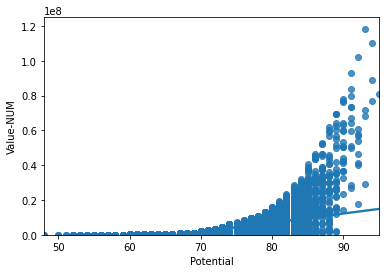

In [6]:
sns.regplot(x="Potential", y="Value-NUM", data=df)
plt.ylim(0,)

(0.0, 124841058.60397637)

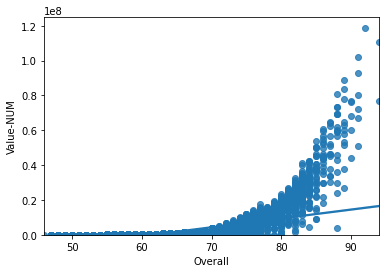

In [7]:
sns.regplot(x="Overall", y="Value-NUM", data=df)
plt.ylim(0,)

(0.0, 124425000.0)

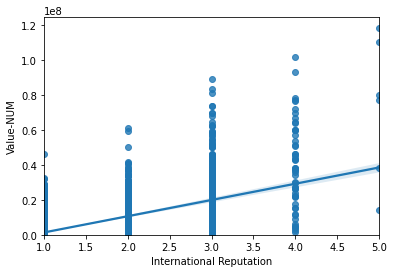

In [8]:
sns.regplot(x="International Reputation", y="Value-NUM", data=df)
plt.ylim(0,)

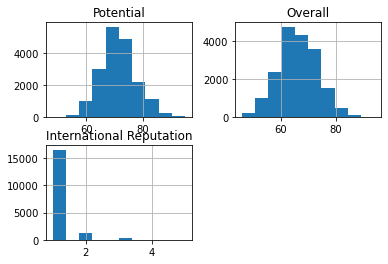

In [9]:
visualizar = df[['Potential','Overall','International Reputation']]
visualizar.hist()
plt.show()

Se puede observar que se presenta una tendendia lineal con la variable Potential y Overall pero no se logra apreciar una relacion lineal con la variable International Reputation, aparentar tener un comportamiento discreto. Tambien se puede ver en el histograma un comportamiento normal en las variables Potencial y Overall

## Analisis de variables categóricas

<AxesSubplot:xlabel='International Reputation', ylabel='Value-NUM'>

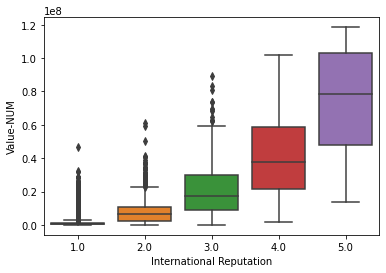

In [10]:
sns.boxplot(x="International Reputation", y="Value-NUM", data=df)

Se puede observar que la distrubion de la variable Value-NUM entre las diferentes categorias de la variables International Reputation es diferente, por lo que podria ser una variable predictora de la variables Value-NUM

## Evaluacion de Correlacion de Pearson y valor P

In [11]:
from scipy import stats
coeficiente_pearson, valor_p = stats.pearsonr(df['Potential'], df['Value-NUM'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.5762182529817004  con un valor de P = 0.0


In [12]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Overall'], df['Value-NUM'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.6270852347262139  con un valor de P = 0.0


Se observa que en ambos casos tenemos un valor P igual a cero, esto indicandonos que tienen una fuerte relacion con la variable Value-NUM

## $\therefore$ Conclusión: Variables importantes

Variables relevantes para predecir el valor de un jugador son las siguientes:

Variables numéricas continuas:
- Potential
- Overall

Variables discretas:
- International Reputation

# Desarrollo del Modelo


In [13]:
df_var_numericas = df._get_numeric_data()
df_var_numericas = df_var_numericas.drop(['Unnamed: 0'], axis=1)
df_var_numericas.head()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value-NUM
0,158023,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0
1,20801,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0
2,190871,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0
3,193080,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0
4,192985,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0


Se dividen los datos en un conjunto de entrenamiento y otro conjunto de pruebas

In [14]:
# valor a predecir
y_datos = df_var_numericas[['Value-NUM']]
y_datos

,Value-NUM
0,110500000.0
1,77000000.0
2,118500000.0
3,72000000.0
4,102000000.0
...,...
18202,60000.0
18203,60000.0
18204,60000.0
18205,60000.0


In [15]:
#variables independientes
x_datos=df_var_numericas.drop('Value-NUM',axis=1)
x_datos

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,1307,1.0,2.0,2.0,22.0,34.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,243165,19,47,63,1098,1.0,2.0,2.0,21.0,23.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,241638,16,47,67,1189,1.0,3.0,2.0,33.0,25.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,246268,17,47,66,1228,1.0,3.0,2.0,34.0,44.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [16]:
from sklearn.model_selection import train_test_split

x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(x_datos, y_datos, test_size=0.10, random_state=1)

print("número de muestras de prueba:", x_prueba.shape[0])
print("número de muestras de entrenamiento:",x_entrena.shape[0])

número de muestras de prueba: 1821
número de muestras de entrenamiento: 16386


Se implementa el modelo lineal

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lreP=LinearRegression()
lreP

LinearRegression()

Se implementa un modelo lineal utilizando la variable Potential como variable independiente

In [20]:
lreP.fit(x_entrena[['Potential']], y_entrena)


LinearRegression()

Una vez terminado el entrenamiento del modelo lineal utilizando la variable Potential como variable independiente se procede a calcular el valor de $R^2$ en los datos de prueba.

In [21]:
print("R cuadrado datos de prueba: ", lreP.score(x_prueba[['Potential']], y_prueba))
print("R cuadrado datos de entrenamiento: ", lreP.score(x_entrena[['Potential']], y_entrena))

R cuadrado datos de prueba:  0.317693716708074
R cuadrado datos de entrenamiento:  0.3338434173331548


 Se observa que el valor de $R^2$ es similar al usando en los datos de prueba con los datos de entrenamiento.

Porbamos un modelo lineal utilizando la variable independiente Overall 

In [22]:
lreO=LinearRegression()
lreO

LinearRegression()

In [23]:
lreO.fit(x_entrena[['Overall']], y_entrena)

LinearRegression()

In [24]:
print("R cuadrado datos de prueba: ", lreO.score(x_prueba[['Overall']], y_prueba))
print("R cuadrado datos de entrenamiento: ", lreO.score(x_entrena[['Overall']], y_entrena))


R cuadrado datos de prueba:  0.3838364183090993
R cuadrado datos de entrenamiento:  0.3944113717542219


Se puede concluir que utilizando Overall tiene un poco mejor el R cuadrado pero no es tan significativo 

Se implementa modelo Lineal Múltiple

In [25]:
lre_multiple=LinearRegression()
lre_multiple

LinearRegression()

In [26]:
Z = x_entrena[['Potential', 'Overall']]

In [27]:
Z

,Potential,Overall
14554,70,61
13397,69,62
3525,72,72
554,80,80
12573,63,63
...,...,...
10955,68,65
17289,75,54
5192,81,70
12172,64,63


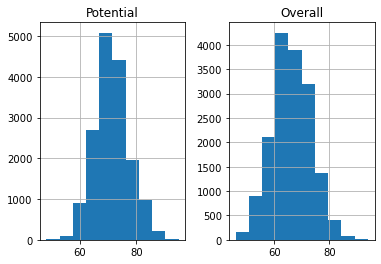

In [28]:
Z.hist()
plt.show()

In [29]:
lre_multiple.fit(Z, y_entrena)

LinearRegression()

In [30]:
print("R cuadrado datos de entrenamiento: ", lre_multiple.score(Z, y_entrena))
print("R cuadrado datos de prueba: ", lre_multiple.score(x_prueba[['Potential', 'Overall']], y_prueba))

R cuadrado datos de entrenamiento:  0.44084227408397103
R cuadrado datos de prueba:  0.4305146286250544


Se observa una mejora en el R cuadrado pero aun sigue siendo menor al 50%. Se procede a utlizar modelos polinomiales


## Modelo polinomial

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
# se crea un modelo de grado 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [33]:
Z_pr=pr.fit_transform(Z)

In [34]:
Z_pr

array([[1.000e+00, 7.000e+01, 6.100e+01, 4.900e+03, 4.270e+03, 3.721e+03],
       [1.000e+00, 6.900e+01, 6.200e+01, 4.761e+03, 4.278e+03, 3.844e+03],
       [1.000e+00, 7.200e+01, 7.200e+01, 5.184e+03, 5.184e+03, 5.184e+03],
       ...,
       [1.000e+00, 8.100e+01, 7.000e+01, 6.561e+03, 5.670e+03, 4.900e+03],
       [1.000e+00, 6.400e+01, 6.300e+01, 4.096e+03, 4.032e+03, 3.969e+03],
       [1.000e+00, 8.700e+01, 8.200e+01, 7.569e+03, 7.134e+03, 6.724e+03]])

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
Entrada=[('normalizar',StandardScaler()), ('polinomio', PolynomialFeatures(include_bias=False)), ('modelo',LinearRegression())]

In [37]:
tuberia=Pipeline(Entrada)
tuberia

Pipeline(steps=[('normalizar', StandardScaler()),
                ('polinomio', PolynomialFeatures(include_bias=False)),
                ('modelo', LinearRegression())])

In [38]:
Z = Z.astype(float)
tuberia.fit(Z,y_entrena)

Pipeline(steps=[('normalizar', StandardScaler()),
                ('polinomio', PolynomialFeatures(include_bias=False)),
                ('modelo', LinearRegression())])

In [39]:
y_tubo=tuberia.predict(Z)
y_tubo[0:4]

array([[-1027460.22274084],
       [ -950918.41862579],
       [ 3058390.11731982],
       [14805225.62617908]])

Se calcula el R cuadrado para evaluar su precision

In [43]:
from sklearn.metrics import r2_score

In [44]:
r_cuadrado = r2_score(y_entrena, y_tubo)
print('El valor de R-cuadrado es: ', r_cuadrado)

El valor de R-cuadrado es:  0.8115861078766994


Se puede ver una mejora significativa en el modelo, teniendo un R cuadrado mayor al 0.80 en los datos de entrenamiento

In [45]:
Z_test = x_prueba[['Potential', 'Overall']]
y_tubo_test=tuberia.predict(Z_test)
y_tubo_test[0:4]

array([[3644246.60209516],
       [4334943.98638736],
       [-878492.24739297],
       [ 186074.39196577]])

In [48]:
 
print('El valor de R-cuadrado datos test es: ', r2_score(y_prueba, y_tubo_test))

El valor de R-cuadrado datos test es:  0.7947764901811001


Se observa que el R cuadrado en datos de prueba es mayor a 0,79, lo que nos da un resultado de mejor calidad en comparacion a los modelos lineales que obtienen un R cuadrado inferior al 0,50. Concluyendo que el mejor modelo que se ajusta a los datos es el modelo polinomial

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
R_cruceP = cross_val_score(lreP, x_prueba[['Potential']], y_prueba, cv=4)
R_cruceO = cross_val_score(lreO, x_prueba[['Overall']], y_prueba, cv=4)
R_crucePoli = cross_val_score(tuberia, Z_test, y_prueba, cv=4)
print("Potential. El promedio de cada iteración es ", R_cruceP.mean(), "y la desviación estándar es " , R_cruceP.std())
print("Overall. El promedio de cada iteración es ", R_cruceO.mean(), "y la desviación estándar es " , R_cruceO.std())
print("Overall. El promedio de cada iteración es ", R_crucePoli.mean(), "y la desviación estándar es " , R_crucePoli.std())

Potential. El promedio de cada iteración es  0.31849105455083704 y la desviación estándar es  0.017399155270014684
Overall. El promedio de cada iteración es  0.37933719742566524 y la desviación estándar es  0.013962299339909681
Overall. El promedio de cada iteración es  0.7963183959518071 y la desviación estándar es  0.02852792421480309


Entodas las pruebas, el modelo Polinomial sigue siendo el mejor para predecir el valor de un jugador